In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv('swing.csv')
df.head()

,year,state,candidatevotes,totalvotes,party_simplified
0,1976,ARIZONA,418642,742719,REPUBLICAN
1,1976,ARIZONA,295602,742719,DEMOCRAT
2,1976,FLORIDA,1636000,3150631,DEMOCRAT
3,1976,FLORIDA,1469531,3150631,REPUBLICAN
4,1976,GEORGIA,979409,1463152,DEMOCRAT


In [2]:
REPUBLICAN_query = df[(df.party_simplified == "REPUBLICAN")] 
DEMOCRAT_query = df[(df.party_simplified == "DEMOCRAT")] 
merged = pd.merge(REPUBLICAN_query, DEMOCRAT_query, on=['year', 'state', 'totalvotes'])

merged['x_percent'] = merged['candidatevotes_x']/merged['totalvotes']
merged['y_percent'] = merged['candidatevotes_y']/merged['totalvotes']

merged['party_win'] = np.where(merged["candidatevotes_x"] > merged["candidatevotes_y"], "REPUBLICAN", "DEMOCRAT")

merged.head()

merged.to_csv('swing_edited.csv', index=True)

In [3]:
merge_clean = pd.read_csv('swing_edited.csv')

ARIZONA_query = merge_clean[(merge_clean.state == "ARIZONA")]
ARIZONA_query.reset_index(inplace=True)
ARIZONA_query.head()

,index,Unnamed: 0,year,state,candidatevotes_x,totalvotes,party_simplified_x,candidatevotes_y,party_simplified_y,x_percent,y_percent,party_win
0,0,0,1976,ARIZONA,418642,742719,REPUBLICAN,295602,DEMOCRAT,0.563661,0.398000,REPUBLICAN
1,9,9,1980,ARIZONA,529688,873945,REPUBLICAN,246843,DEMOCRAT,0.606088,0.282447,REPUBLICAN
2,18,18,1984,ARIZONA,681416,1025897,REPUBLICAN,333854,DEMOCRAT,0.664215,0.325426,REPUBLICAN
3,27,27,1988,ARIZONA,702541,1171873,REPUBLICAN,454029,DEMOCRAT,0.599503,0.387439,REPUBLICAN
4,36,36,1992,ARIZONA,572086,1486975,REPUBLICAN,543050,DEMOCRAT,0.384731,0.365205,REPUBLICAN


In [4]:
REPUBLICAN = pd.DataFrame(ARIZONA_query['x_percent']) # REPUBLICAN Response
DEMOCRAT = pd.DataFrame(ARIZONA_query['y_percent'])   # DEMOCRAT Predictor

In [5]:
print("Data type : ", type(ARIZONA_query))
print("Data dims : ", ARIZONA_query.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (12, 12)


In [6]:
# Train Set : 9 samples
REPUBLICAN_train = pd.DataFrame(REPUBLICAN[:9])
DEMOCRAT_train = pd.DataFrame(DEMOCRAT[:9])

# Test Set : 3 samples
REPUBLICAN_test = pd.DataFrame(REPUBLICAN[-3:])
DEMOCRAT_test = pd.DataFrame(DEMOCRAT[-3:])

# Check the sample sizes
print("Train Set :", REPUBLICAN_train.shape, DEMOCRAT_train.shape)
print("Test Set  :", REPUBLICAN_test.shape, DEMOCRAT_test.shape)

Train Set : (9, 1) (9, 1)
Test Set  : (3, 1) (3, 1)


<AxesSubplot:>

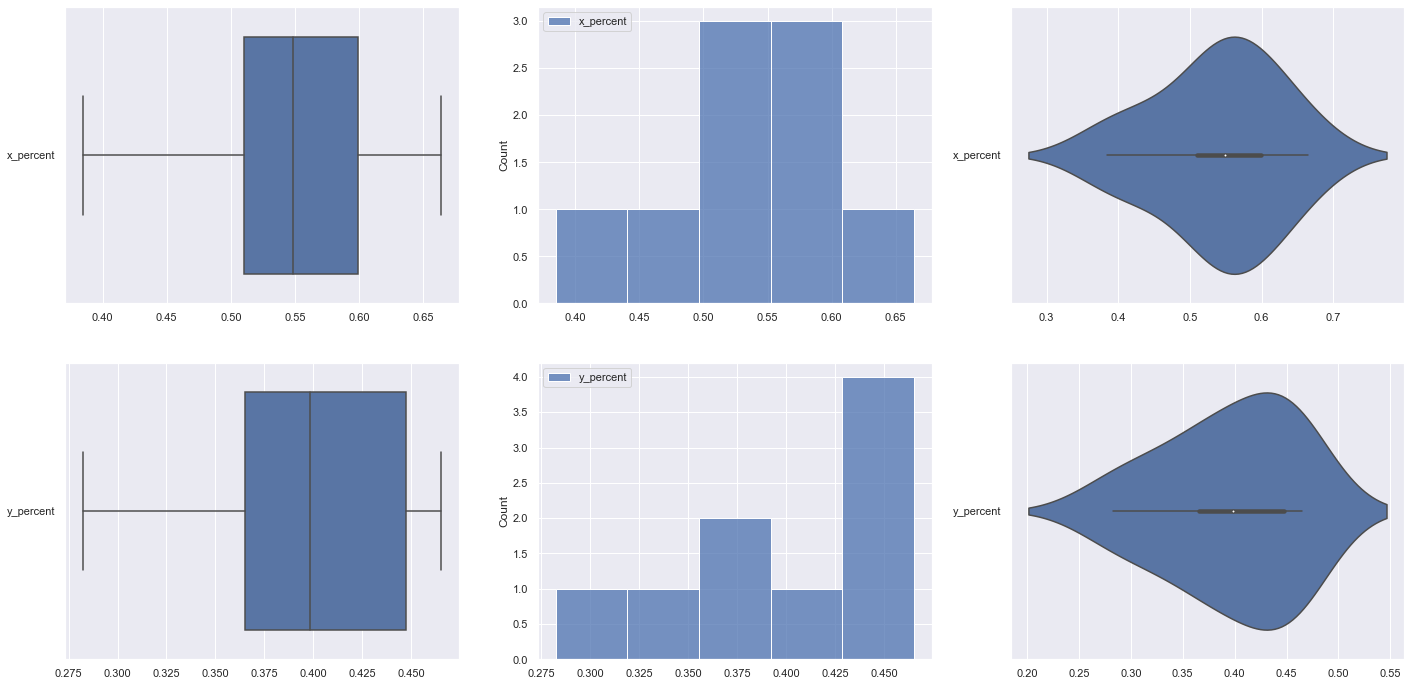

In [7]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(data = REPUBLICAN_train, orient = "h", ax = axes[0,0])
sb.histplot(data = REPUBLICAN_train, ax = axes[0,1])
sb.violinplot(data = REPUBLICAN_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(data = DEMOCRAT_train, orient = "h", ax = axes[1,0])
sb.histplot(data = DEMOCRAT_train, ax = axes[1,1])
sb.violinplot(data = DEMOCRAT_train, orient = "h", ax = axes[1,2])

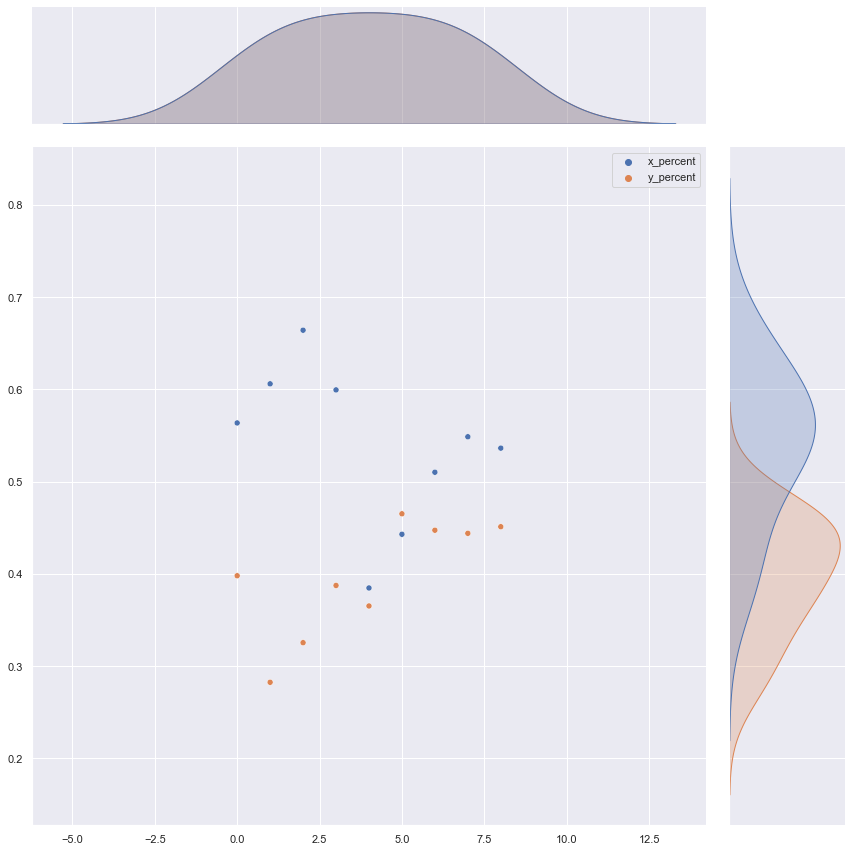

In [8]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([REPUBLICAN_train, DEMOCRAT_train], axis = 1).reindex(REPUBLICAN_train.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = trainDF, height = 12)

<AxesSubplot:>

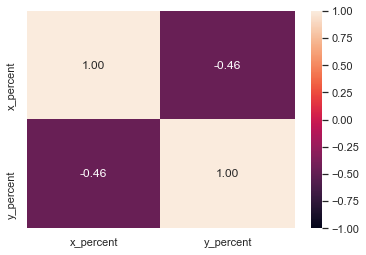

In [9]:
# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [10]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [11]:
# Train the Linear Regression model
linreg.fit(REPUBLICAN_train, DEMOCRAT_train)

LinearRegression()

In [12]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [0.58082522]
Coefficients 	: a =  [[-0.34207909]]


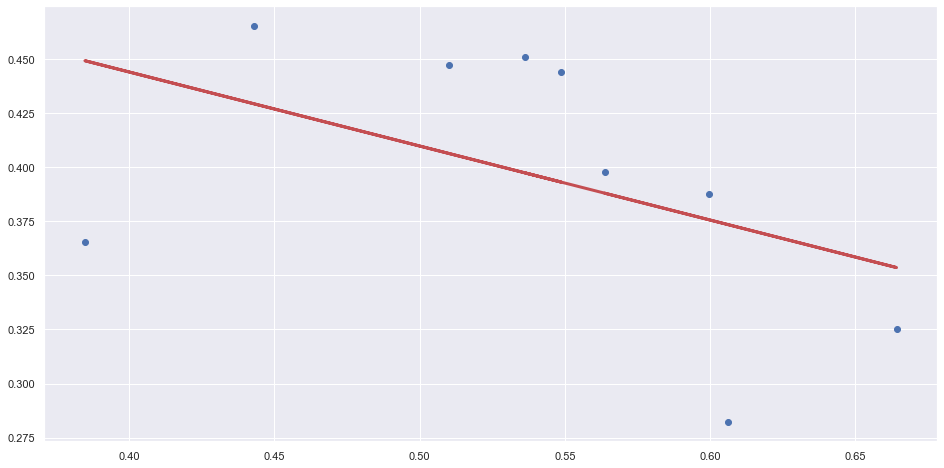

In [13]:
regline_x = REPUBLICAN_train
regline_y = linreg.intercept_ + linreg.coef_ * REPUBLICAN_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(REPUBLICAN_train, DEMOCRAT_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

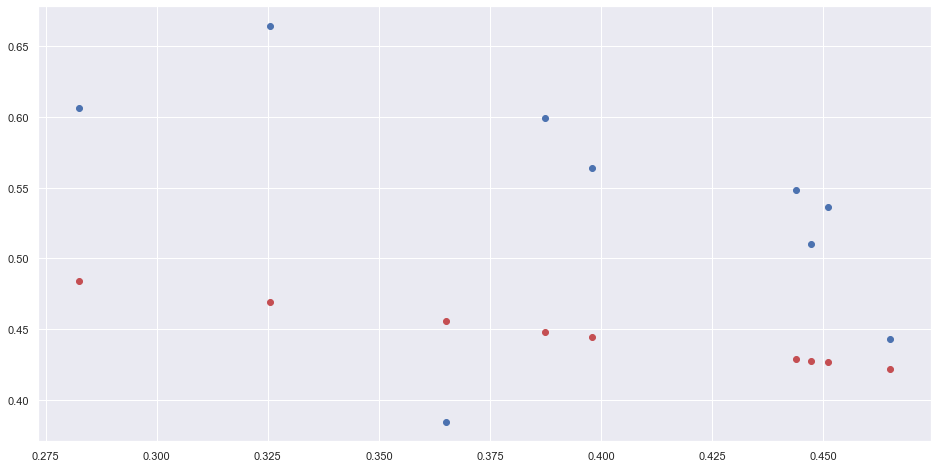

In [14]:
# Predict REPUBLICAN values corresponding to DEMOCRAT_train
# REPUBLICAN Response
# DEMOCRAT Predictor
REPUBLICAN_train_pred = linreg.predict(DEMOCRAT_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(DEMOCRAT_train, REPUBLICAN_train)
plt.scatter(DEMOCRAT_train, REPUBLICAN_train_pred, color = "r")
plt.show()

In [15]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(REPUBLICAN_train, DEMOCRAT_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(REPUBLICAN_train, REPUBLICAN_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.21582695419233078
Mean Squared Error (MSE) 	: 0.014278262519015348
Root Mean Squared Error (RMSE) 	: 0.11949168389061787


Intercept of Regression 	: b =  [0.77755107]
Coefficients of Regression 	: a =  [[-0.60561723]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2441163176957054
Mean Squared Error (MSE) 	: 0.00500853478257124

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.31969347238065204
Mean Squared Error (MSE) 	: 0.0006901408315376521



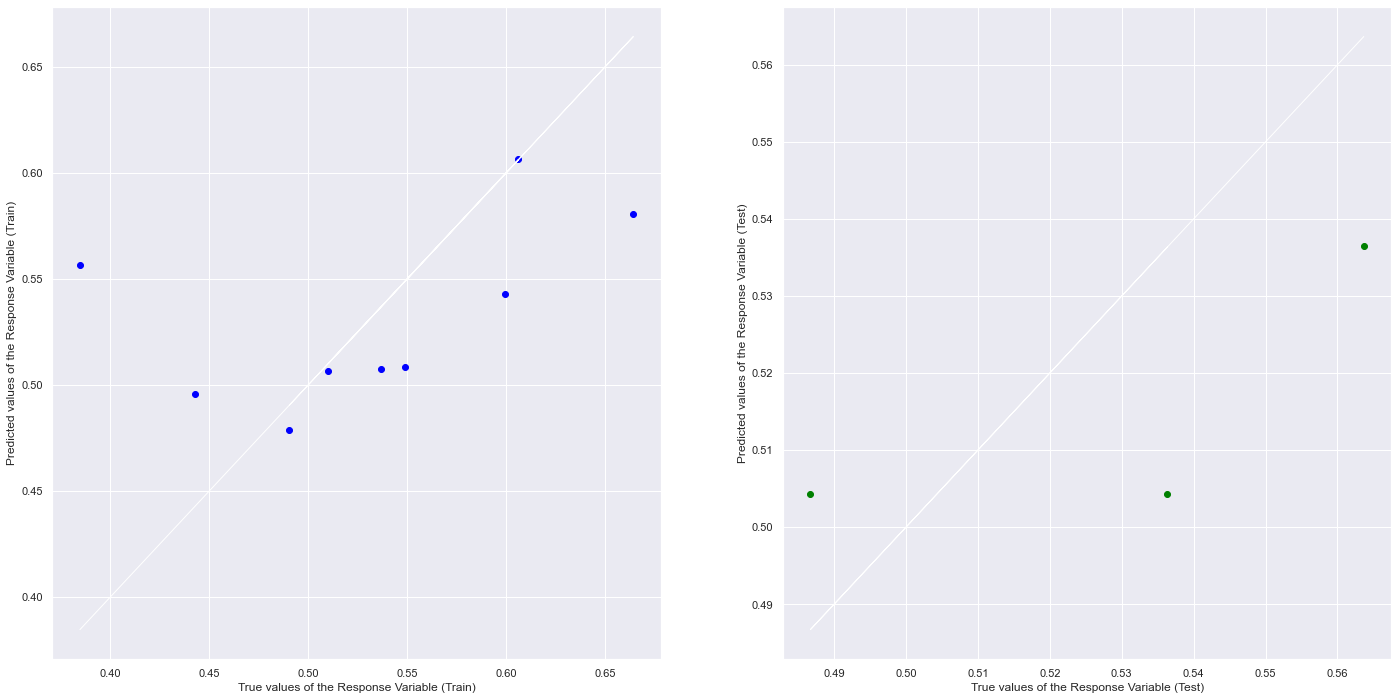

In [16]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
REPUBLICAN = pd.DataFrame(ARIZONA_query['x_percent'])   # Response
DEMOCRAT = pd.DataFrame(ARIZONA_query['y_percent'])     # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(DEMOCRAT, REPUBLICAN, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [17]:
predict = linreg.predict(DEMOCRAT)

test = pd.DataFrame(predict, columns = ['x_predict'])

test

,x_predict
0,0.536516
1,0.606496
2,0.580467
3,0.542911
4,0.556377
5,0.495836
6,0.506631
7,0.508676
8,0.504325
9,0.507508


In [18]:
test = pd.merge(ARIZONA_query, test, left_index=True, right_index=True)
test

,index,Unnamed: 0,year,state,candidatevotes_x,totalvotes,party_simplified_x,candidatevotes_y,party_simplified_y,x_percent,y_percent,party_win,x_predict
0,0,0,1976,ARIZONA,418642,742719,REPUBLICAN,295602,DEMOCRAT,0.563661,0.398000,REPUBLICAN,0.536516
1,9,9,1980,ARIZONA,529688,873945,REPUBLICAN,246843,DEMOCRAT,0.606088,0.282447,REPUBLICAN,0.606496
2,18,18,1984,ARIZONA,681416,1025897,REPUBLICAN,333854,DEMOCRAT,0.664215,0.325426,REPUBLICAN,0.580467
3,27,27,1988,ARIZONA,702541,1171873,REPUBLICAN,454029,DEMOCRAT,0.599503,0.387439,REPUBLICAN,0.542911
4,36,36,1992,ARIZONA,572086,1486975,REPUBLICAN,543050,DEMOCRAT,0.384731,0.365205,REPUBLICAN,0.556377
5,45,45,1996,ARIZONA,622073,1404405,REPUBLICAN,653288,DEMOCRAT,0.442944,0.465171,DEMOCRAT,0.495836
6,54,54,2000,ARIZONA,781652,1532016,REPUBLICAN,685341,DEMOCRAT,0.510211,0.447346,REPUBLICAN,0.506631
7,63,63,2004,ARIZONA,1104294,2012585,REPUBLICAN,893524,DEMOCRAT,0.548694,0.443968,REPUBLICAN,0.508676
8,72,72,2008,ARIZONA,1230111,2293475,REPUBLICAN,1034707,DEMOCRAT,0.536352,0.451153,REPUBLICAN,0.504325
9,81,81,2012,ARIZONA,1233654,2299254,REPUBLICAN,1025232,DEMOCRAT,0.536545,0.445898,REPUBLICAN,0.507508


In [19]:
test['predict_win'] = np.where(test["x_predict"] > test["y_percent"], "REPUBLICAN", "DEMOCRAT")

In [20]:
test

,index,Unnamed: 0,year,state,candidatevotes_x,totalvotes,party_simplified_x,candidatevotes_y,party_simplified_y,x_percent,y_percent,party_win,x_predict,predict_win
0,0,0,1976,ARIZONA,418642,742719,REPUBLICAN,295602,DEMOCRAT,0.563661,0.398000,REPUBLICAN,0.536516,REPUBLICAN
1,9,9,1980,ARIZONA,529688,873945,REPUBLICAN,246843,DEMOCRAT,0.606088,0.282447,REPUBLICAN,0.606496,REPUBLICAN
2,18,18,1984,ARIZONA,681416,1025897,REPUBLICAN,333854,DEMOCRAT,0.664215,0.325426,REPUBLICAN,0.580467,REPUBLICAN
3,27,27,1988,ARIZONA,702541,1171873,REPUBLICAN,454029,DEMOCRAT,0.599503,0.387439,REPUBLICAN,0.542911,REPUBLICAN
4,36,36,1992,ARIZONA,572086,1486975,REPUBLICAN,543050,DEMOCRAT,0.384731,0.365205,REPUBLICAN,0.556377,REPUBLICAN
5,45,45,1996,ARIZONA,622073,1404405,REPUBLICAN,653288,DEMOCRAT,0.442944,0.465171,DEMOCRAT,0.495836,REPUBLICAN
6,54,54,2000,ARIZONA,781652,1532016,REPUBLICAN,685341,DEMOCRAT,0.510211,0.447346,REPUBLICAN,0.506631,REPUBLICAN
7,63,63,2004,ARIZONA,1104294,2012585,REPUBLICAN,893524,DEMOCRAT,0.548694,0.443968,REPUBLICAN,0.508676,REPUBLICAN
8,72,72,2008,ARIZONA,1230111,2293475,REPUBLICAN,1034707,DEMOCRAT,0.536352,0.451153,REPUBLICAN,0.504325,REPUBLICAN
9,81,81,2012,ARIZONA,1233654,2299254,REPUBLICAN,1025232,DEMOCRAT,0.536545,0.445898,REPUBLICAN,0.507508,REPUBLICAN


In [21]:
test.to_csv('swing_predict.csv', index=True)